### 一、使用k-means算法对相似对象进行分组

在聚类算法的实际应用中，我们没有任何关于这些样本的类别基础信息；否则算法就要划分到监督学习的范畴了。由此，我们的目标就是根据样本自身特征的相似性对其进行分组，对此可采用k-means算法，具体有如下四个步骤：  
(1)从样本点中随机选择k个点作为初始簇中心。  
(2)将每个样本点划分到距离它最近的中心点$\mu^{(j)}, \mathrm{j} \in\{1, \ldots, \mathrm{k}\}$所代表的簇中。  
(3)用各簇中所有样本的中心点替代原有的中心点。  
(4)重复步骤2和3，直到中心点不变或者达到预定迭代次数时，算法终止。  

从上述过程可知，k-means聚类算法的关键是如何度量对象之间的相似性。可以用距离函数来度量对象之间的相似性，距离越小则相似性越大，反之则越小。在m维空间上，常常使用欧几里得距离的平方作为度量函数：  

$$
d(\boldsymbol{x}, \boldsymbol{y})^{2}=\sum_{j=1}^{m}\left(x_{j}-y_{j}\right)^{2}=\|\boldsymbol{x}-\boldsymbol{y}\|_{2}^{2}
$$

在前面的公式中，下标索引j为样本点x和y的第j个维度(特征列)。

基于欧几里得度量标准，我们可以将k-means算法描述为一个简单的优化问题，通过迭代使得簇内误差平方和(within-cluster sum of squared errors，SSE)最小，也称作簇惯性(cluster intertia)。  

$$
S S E=\sum_{i=1}^{n} \sum_{j=1}^{k} w^{(i, j)}=\left\|\boldsymbol{x}^{(i)}-\boldsymbol{\mu}^{(j)}\right\|_{2}^{2}
$$

其中，μ(j)为簇j的中心点，如果样本x(i)属于簇j，则有w(i,j)＝1，否则w（i,j）＝0。

#### 1.创建数据集

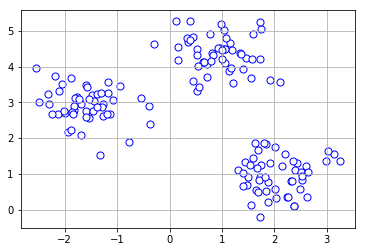

In [173]:
from sklearn.datasets import make_blobs

# 函数返回两个参数，第一个参数是点的二维坐标，第二个参数是类标。
X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)


import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c='white',edgecolors='blue', marker='o', s=50)

plt.grid()
plt.show()

#### 2.借助scikit-learn库中的KMeans类将k-means算法应用于我们的示例数据集：

cluster center points:
[[ 0.9329651   4.35420712]
 [ 2.06521743  0.96137409]
 [-1.5947298   2.92236966]]


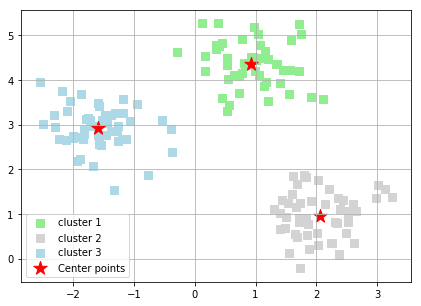

In [2]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)

y_km = km.fit_predict(X) # 返回簇的分类结果,是一个ndarray的一维数组，保存每一个数据的簇序号

print('cluster center points:')
print(km.cluster_centers_)

plt.figure(figsize=(7, 5))
plt.scatter(X[y_km==0, 0], X[y_km==0, 1], s=50, c='lightgreen', marker='s', label='cluster 1')
plt.scatter(X[y_km==1, 0], X[y_km==1, 1], s=50, c='lightgray', marker='s', label='cluster 2')
plt.scatter(X[y_km==2, 0], X[y_km==2, 1], s=50, c='lightblue', marker='s', label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='red',  marker='*',s=200, label='Center points')

plt.legend(loc='lower left')
plt.grid()
plt.show()

#### 3.k-means++算法

经典的k-means算法，它使用**随机点作为初始中心点**，若初始中心点选择不当，有可能会导致簇效果不佳或产生收敛速度慢等问题。解决此问题的一种方案就是在数据集上多次运行k-means算法，并根据误差平方和(SSE)选择性能最好的模型。另一种方案就是使用**k-means++**算法让初始中心点彼此尽可能远离，相比传统k-means算法，它能够产生更好、更一致的结果。

k-maens++算法比传统的k-menas算法多了一个计算中心点的步骤，可以总结为以下几步：  
  
  
(1)初始化一个空的集合M，用于存储选定的k个中心点。  
(2)从输入样本中随机选定第一个中心点μ(j)，并将其加入到集合M中。  
(3)对于集合M之外的任一样本点x(i)，通过计算找到与中心点平方距离最短的样本$\mathrm{d}\left(\mathrm{x}^{(\mathrm{i})}, \mathrm{M}\right)^{2}$。  
(4)使用加权概率分布$\frac{d\left(\boldsymbol{\mu}^{(p)}, \mathbf{M}\right)^{2}}{\sum_{i} d\left(\boldsymbol{x}^{(i)}, \mathbf{M}\right)^{2}}$来随机选择下一个中心点μ(p)。  
(5)重复步骤2、3，直到选定k个中心点。  
(6)基于选定的中心点执行k-means算法。  

k-means++算法在选取中心点时，遵循的原则是中心点之间的距离尽可能远。直接通过scikit-learn库的KMeans类即可实现此算法，只需要把init参数设为"k-means++"即可。

#### 4.硬聚类和软聚类

硬聚类(hard clustering)指的是数据集中每个样本只能划至一个簇的算法，例如我们在前面中讨论过的k-means算法。相反，软聚类(soft clustering)，有时也称作模糊聚类(fuzzy clustering)算法可以将一个样本划分到一个或者多个簇。

一个常见的软聚类算法是模糊C-means(fuzzy C-means, FCM)算法。FCM的处理过程与k-means十分相似。但是，我们使用每个样本点隶属于各簇的概率来替代硬聚类的划分。在k-means中，我们使用二进制稀疏向量来表示各簇所含样本。在FCM中则使用属于某个簇的概率来组成隶属向量。

$$
\left[\begin{array}{l}{\mu^{(1)} \rightarrow 0.1} \\ {\mu^{(2)} \rightarrow 0.85} \\ {\mu^{(3)} \rightarrow 0.05}\end{array}\right]
$$


FCM算法可总结为以下四个步骤：  
(1)指定k个中心点，并随机将每个样本点划分至某个簇。  
(2)计算各簇中心$\mu^{(j)}, j \in\{1, \ldots, k\}$。  
(3)更新各样本点所属簇的成员隶属度(隶属向量)。  
(4)重复步骤2、3，直到各样本点所属簇成员隶属度不变，或是达到用户自定义的容差阈值或最大迭代次数。

FCM的目标函数如下式所示：

$$
J_{m}=\sum_{i=1}^{n} \sum_{j=1}^{k} w^{m(i, j)}\left\|\boldsymbol{x}^{(i)}-\boldsymbol{\mu}^{(j)}\right\|_{2}^{2}, m \in[1, \infty]
$$

样本点属于某个簇的概率计算公式如下所示：  

$$
w^{(i, j)}=\left[\sum_{p=1}^{k}\left(\frac{\left\|\boldsymbol{x}^{(i)}-\boldsymbol{\mu}^{(j)}\right\|_{2}}{\left\|\boldsymbol{x}^{(i)}-\boldsymbol{\mu}^{(p)}\right\|_{2}}\right)^{\frac{2}{m-1}}\right]^{-1}
$$

以样本属于特定簇的隶属度为权重，此簇中心μ(j)可以通过所有样本的加权均值计算得到：

$$
\mu^{(j)}=\frac{\sum_{i=1}^{n} w^{m(i, j)} x^{(i)}}{\sum_{i=1}^{n} w^{m(i, j)}}
$$

#### 4.使用肘方法确定簇的最佳数量

由于没有数据集样本类标的确切数据，所以我们无法在无监督学习中使用评估监督学习模型性能的相关技术。为了对聚类效果进行定量分析，我们需要使用模型内部的固有度量来比较不同k-means聚类结果的性能，例如先前讨论过的**簇内误差平方和**(即聚类偏差)。

In [3]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


基于簇内误差平方和，我们可使用图形工具，即所谓的肘方法，针对给定任务估计出最优的簇数量k。直观地看，增加k的值可以降低聚类偏差。这是因为样本会更加接近其所在簇的中心点。肘方法的基本理念就是找出聚类偏差骤增时的k值，我们可以绘制出不同k值对应的聚类偏差图，以做更清晰的观察。

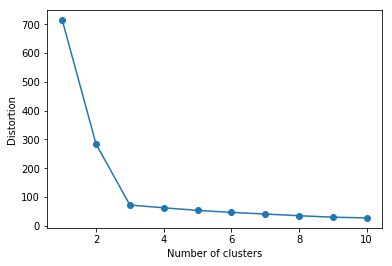

In [4]:
distortions = []
for i in range(1 ,11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

注：如上图所示，当k＝3时图案呈现了肘型，这表明对于此数据集来说，k＝3是聚类偏差骤增的k值，而此值就是簇的最佳数量。

#### 5.通过轮廓图定量分析聚类质量

轮廓分析(silhouette analysis)是另一种评估聚类质量的定量分析方法。轮廓分析可以使用一个图形工具来度量簇中样本聚集的密集程度。通过以下三个步骤，我们可以计算数据集中单个样本的轮廓系数。

(1)将某一样本x(i)与簇内其他点之间的平均距离看作是簇的内聚度a(i)。  
(2)将样本x(i)与其最近簇中所有点之间的平均距离看作是与下一最近簇的分离度b(i)。  
(3)将簇分离度与簇内聚度之差除以二者中的较大者得到轮廓系数，如下式所示：  

$$
s^{(i)}=\frac{b^{(i)}-a^{(i)}}{\max \left\{b^{(i)}, a^{(i)}\right\}}
$$

轮廓系数的值介于-1到1之间。如果b(i) >> a(i)，我们可以近似得到一个值为1的理想的轮廓系数。

轮廓系数可通过scikit-learn中metric模块下的silhouette_samples计算得到，也可选择使用silhouette_scores。后者计算所有样本点的轮廓系数均值，等价于numpy.mean(silhouette_samples(…))。

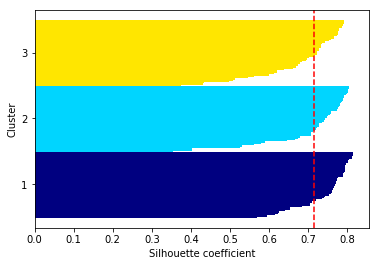

In [5]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)

y_km = km.fit_predict(X)

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, left=0, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels + 1) # 设置轴的刻度，第一个参数是位置，第二个参数是刻度值
plt.xlabel('Silhouette coefficient')
plt.ylabel('Cluster')
plt.show()

由上图可见，轮廓系数未接近0点，此指标显示聚类效果不错。此外，为了评判聚类效果的优劣，我们在图中增加了轮廓系数的平均值（虚线）。

为了解聚类效果不佳的轮廓图的形状，我们使用两个中心点来初始化k-means算法：

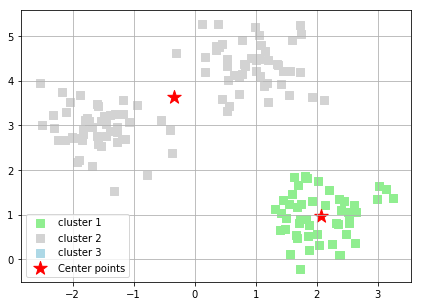

In [6]:
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

plt.figure(figsize=(7, 5))
plt.scatter(X[y_km==0, 0], X[y_km==0, 1], s=50, c='lightgreen', marker='s', label='cluster 1')
plt.scatter(X[y_km==1, 0], X[y_km==1, 1], s=50, c='lightgray', marker='s', label='cluster 2')
plt.scatter(X[y_km==2, 0], X[y_km==2, 1], s=50, c='lightblue', marker='s', label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='red',  marker='*',s=200, label='Center points')

plt.legend(loc='lower left')
plt.grid()
plt.show()

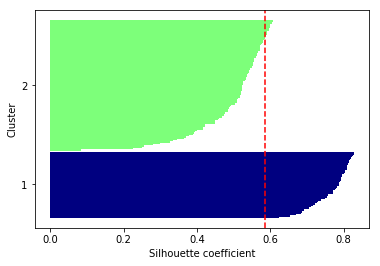

In [7]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, left=0, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels + 1) # 设置轴的刻度，第一个参数是位置，第二个参数是刻度值
plt.xlabel('Silhouette coefficient')
plt.ylabel('Cluster')
plt.show()

#### 6.层次聚类

将学习另一种基于原型的聚类：层次聚类（hierarchical clustering）。层次聚类算法的一个优势在于：它能够使我们绘制出树状图（dendrogram，基于二叉层次聚类的可视化），这有助于我们使用有意义的分类法解释聚类结果。**层次聚类的另一优势在于我们无需事先指定簇数量。**

层次聚类有两种主要方法：凝聚(agglomerative)层次聚类和分裂(divisive)层次聚类。在分裂层次聚类中，我们首先把所有样本看作是在同一个簇中，然后迭代地将簇划分为更小的簇，直到每个簇只包含一个样本。本节我们将主要介绍凝聚层次聚类，它与分裂层次聚类相反，最初我们把每个样本都看作是一个单独的簇，重复地将最近的一对簇进行合并，直到所有的样本都在一个簇中为止。

凝聚层次聚类中，判定簇间距离的两个标准方法分别是单连接（single linkage）和全连接（complete linkage）。我们可以使用单连接方法计算每一对簇中最相似两个样本的距离，并合并距离最近的两个样本所属簇。与之相反，全连接的方法是通过比较找到分布于两个簇中最不相似的样本（距离最远的样本），进而完成簇的合并。

凝聚层次聚类中其他常用的算法还有平均连接和ward连接。以下内容**主要围绕着基于全连接方法的凝聚层次聚类展开**，其迭代过程可总结如下：

(1)计算得到所有样本间的距离矩阵。  
(2)将每个数据点看作是一个单独的簇。  
(3)基于最不相似(距离最远)样本的距离，合并两个最接近的簇。  
(4)更新相似矩阵(样本间距离矩阵)。  
(5)重复步骤2到4，直到所有样本都合并到一个簇。  

以下代码讨论了如何计算距离矩阵。

In [3]:
# 生成数据
import pandas as pd
import numpy as np

np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_%d' % i for i in range(100)]
X = np.random.random_sample([100, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443
ID_5,7.379954,1.824917,1.754518
ID_6,5.315514,5.318276,6.344010
ID_7,8.494318,7.244553,6.110235
ID_8,7.224434,3.229589,3.617887
ID_9,2.282632,2.937140,6.309761


使用SciPy库中spatial.distanct子模块下的pdist函数来计算距离矩阵，此矩阵作为层次聚类算法的输入：

In [5]:
from scipy.spatial.distance import pdist, squareform

'''
pdist函数得到两两样本之间的欧几里得距离(基于样本点的所有特征列)，得到是矢量的数据类型。
squareform函数将这个矢量转换为矩阵形式，不对其值做任何改变。
'''
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=labels, index=labels)
print('vector-form distance vector: \n', pdist(df, metric='euclidean'))
print(pdist(df, metric='euclidean').shape)
row_dist

vector-form distance vector: 
 [ 4.973534    5.51665266  5.89988504 ...  9.35350297  4.06980354
 10.99103617]
(4950,)


,ID_0,ID_1,ID_2,ID_3,ID_4,ID_5,ID_6,ID_7,ID_8,ID_9,...,ID_90,ID_91,ID_92,ID_93,ID_94,ID_95,ID_96,ID_97,ID_98,ID_99
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396,1.229194,5.036439,6.025833,1.422617,6.185394,...,4.764631,4.183033,4.171853,9.248896,7.734286,9.408061,7.024692,7.280663,10.462360,4.304885
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233,6.201025,2.832759,3.524364,4.361939,5.734452,...,6.120090,3.702095,4.770013,6.853131,5.706974,5.385266,2.870850,7.016021,6.151935,6.867368
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594,6.360804,4.987530,1.890561,4.602991,8.612447,...,9.049842,7.090641,5.684986,10.809088,9.626875,5.544183,3.882520,5.667857,9.386589,5.883162
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864,6.722517,2.529602,6.069917,4.943730,1.972646,...,7.318082,5.988270,2.325207,9.687915,8.516760,7.185039,7.545380,5.211343,6.528339,5.212531
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000,3.927912,5.361296,8.099968,3.888627,3.914844,...,5.196775,5.346871,3.667507,10.006823,8.578441,10.626109,9.395045,7.477496,10.236888,4.577652
ID_5,1.229194,6.201025,6.360804,6.722517,3.927912,0.000000,6.126084,7.041771,2.338682,6.926036,...,5.193132,5.121016,4.903937,10.145014,8.624296,10.522760,8.171160,7.856656,11.632011,4.386089
ID_6,5.036439,2.832759,4.987530,2.529602,5.361296,6.126084,0.000000,3.724244,3.929165,3.856079,...,6.973991,5.006518,2.476121,8.742001,7.551318,5.304875,5.057820,4.844315,5.936944,5.164650
ID_7,6.025833,3.524364,1.890561,6.069917,8.099968,7.041771,3.724244,0.000000,4.893296,7.561657,...,9.056179,6.869516,4.999676,10.287089,9.187580,3.845960,3.271311,4.877864,7.658563,6.007177
ID_8,1.422617,4.361939,4.602991,4.943730,3.888627,2.338682,3.929165,4.893296,0.000000,5.634990,...,5.681876,4.600561,2.992615,9.607599,8.128298,8.247061,6.392989,5.884857,9.652153,3.316298
ID_9,6.185394,5.734452,8.612447,1.972646,3.914844,6.926036,3.856079,7.561657,5.634990,0.000000,...,6.310099,5.445185,3.691719,8.783925,7.657054,8.658822,8.453673,7.132164,6.817185,6.416268


在上述代码中，我们基于样本的特征X、Y和Z，使用欧几里得距离计算了样本间的两两距离。通过将pdist函数的返回值输入到squareform函数中，我们得到了一个记录成对样本间距离的对称矩阵。

下面我们使用SciPy中cluster.hierarchy子模块下的linkage函数，此函数以全连接作为距离判定标准，它能够返回一个所谓的关联矩阵(linkage matrix)。调用此函数需要注意输出数据的格式，该数据可以是pdist函数返回的距离矢量，或者是原始的数据(numpy ndarray格式的矩阵，数据大小为[n_samples, n_features])。<font color=red>**不能是上述squareform函数得到的距离矩阵。**</font>

In [12]:
# 法一：使用pdist函数返回的距离矢量
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
print(row_clusters.shape)

# 法二：以原始数据作为输入

row_clusters_ = linkage(df.values, method='complete', metric='euclidean')


(99, 4)


In [7]:
pd.DataFrame(row_clusters, columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'], 
             index=['cluster %d' % (i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,9.0,89.0,0.087949,2.0
cluster 2,13.0,16.0,0.214210,2.0
cluster 3,19.0,35.0,0.553399,2.0
cluster 4,10.0,59.0,0.580145,2.0
cluster 5,55.0,97.0,0.610717,2.0
cluster 6,31.0,56.0,0.640183,2.0
cluster 7,5.0,22.0,0.689532,2.0
cluster 8,30.0,96.0,0.827399,2.0
cluster 9,32.0,45.0,0.856558,2.0
cluster 10,62.0,80.0,0.873542,2.0


如上表所示，关联矩阵包含多行，每行代表一次簇的合并。矩阵的第一列和第二列分别表示每个簇中最不相似（距离最远）的样本，第三列为这些样本间的距离，最后一列为每个簇中样本的数量。

下面采用树状图的形式对聚类结果进行可视化展示：

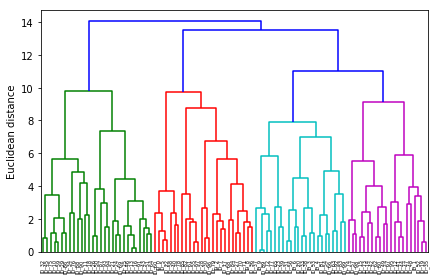

In [9]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

row_dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

实际应用中，层次聚类的树状图通常与热度图（heat map）结合使用，这样我们可以使用不同的颜色来代表样本矩阵中的独立值。在本节中，我们讨论如何将树状图附加到热度图上，并同时显示在一行上。下面将逐步完成此项操作：

[35, 19, 52, 1, 48, 47, 44, 41, 12, 95, 67, 49, 80, 62, 42, 14, 73, 15, 98, 57, 74, 99, 83, 92, 63, 66, 54, 81, 4, 53, 3, 38, 33, 20, 6, 56, 31, 39, 23, 65, 77, 72, 89, 9, 37, 36, 8, 71, 70, 27, 84, 68, 17, 7, 2, 79, 96, 30, 28, 97, 55, 61, 82, 85, 78, 40, 58, 22, 5, 0, 60, 64, 51, 43, 91, 16, 13, 46, 25, 69, 24, 21, 94, 93, 87, 50, 26, 18, 11, 90, 88, 76, 34, 86, 29, 59, 10, 75, 45, 32]


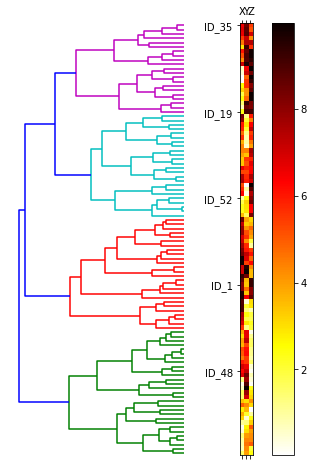

In [29]:
# 创建一个figure对象：
fig = plt.figure(figsize=(12, 10))
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation='left')

# 根据树状图对象中的簇类标重排原始DataFrame对象中的数据。
print(row_dendr['leaves'][::-1])
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]
# 基于重排后的原始数据，在树状图的右侧绘制热度图：
axm = fig.add_axes([0.01, 0.1, 0.45, 0.6])
cax = axm.matshow(df_rowclust.values, interpolation='nearest', cmap='hot_r')
# 美化图形
axd.set_xticks([]) # 删除坐标轴
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

如上图所示，热度图中的行反映了树状图中样本聚类的情况。除了简单的树状图外，热度图中用颜色代表的各样本及其特征为我们提供了关于数据集的一个良好的概括。

###### 通过scikit-learn进行凝聚聚类

Cluster labels: [2 0 2 0 0 2 0 2 2 0 1 1 0 1 0 0 1 2 1 0 0 1 2 0 1 1 1 2 2 1 2 0 1 0 1 0 2
 0 0 0 2 0 0 1 0 1 1 0 0 0 1 1 0 0 0 2 0 0 2 1 2 2 0 0 1 0 0 0 2 1 2 2 0 0
 0 1 1 0 2 2 0 0 2 0 2 2 1 1 1 0 1 1 0 1 1 0 2 2 0 0]


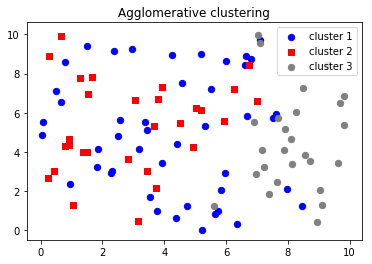

In [43]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')

labels = ac.fit_predict(X) # 此函数会返回聚类的结果，返回的是每一个样本对应的簇序号
print('Cluster labels: %s' % labels)
plt.scatter(X[labels==0, 0], X[labels==0, 1], c='blue', marker='o', s=40, label='cluster 1')
plt.scatter(X[labels==1, 0], X[labels==1, 1], c='red', marker='s', s=40, label='cluster 2')
plt.scatter(X[labels==2, 0], X[labels==2, 1], c='gray', marker='o', s=40, label='cluster 3')
plt.title('Agglomerative clustering')
plt.legend()
plt.show()

#### 7.基于密度空间的聚类算法(Density-based Spatial Clustering of Applications with Noise，DBSCAN)

在DBSCAN中，基于以下标准，每个样本点都被赋予一个特殊的标签：  
如果在一个点周边的指定半径内，其他样本点的数量不小于指定数量(MinPts),则此样本点称为<font color=red>**核心点(core point)**</font>；在指定半径$\varepsilon$内，如果一个点的邻居点少于MinPts个，但是却包含一个核心点，则此点称为<font color=red>**边界点(border point)**</font>；除了核心点和边界点外的其他样本点称为<font color=red>**噪声点(noise point)**</font>。

在完成对核心点、边界点和噪声点的标记后，DBSCAN算法可总结为两个简单的步骤：  
&emsp;&emsp;(1)基于每个核心点或者一组相连的核心点(如果核心点的距离很近，则将其看作是相连的)形成一个单独的簇。  
&emsp;&emsp;(2)将每个边界点划分到相应的核心点所在的簇中。

从以上过程可以看出，算法只对核心点和边界点进行迭代处理，并没有考虑噪声点。从图像上直观理解就是找到簇的核心以及边界来完成聚类。

与k-means算法不同，DBSCAN的簇空间不一定是球状的，这也是此算法的优势之一。此外，不同于k-means和层次聚类，由于DBSCAN可以识别并移除噪声点，因此它不一定会将所有的样本点都划分到某一簇中。

为了给出一个更能说明问题的例子，我们创建一个半月形结构的数据集，以对k-means聚类、层次聚类和DBSCAN聚类进行比较：

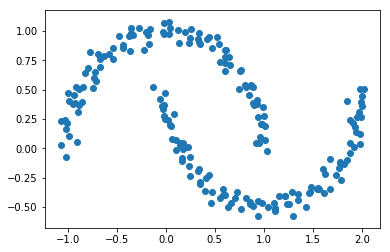

In [166]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

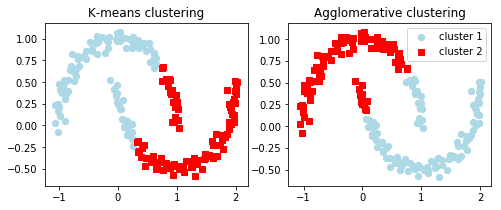

In [171]:
f, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0, 0], X[y_km==0, 1], c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km==1, 0], X[y_km==1, 1], c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')


ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0, 0], X[y_ac==0, 1], c='lightblue', marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac==1, 0], X[y_ac==1, 1], c='red', marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')
plt.legend()
plt.show()

从聚类结果图像可见，k-means算法以及基于全连接的层次聚类算法均无法将两个半月形的数据分开。

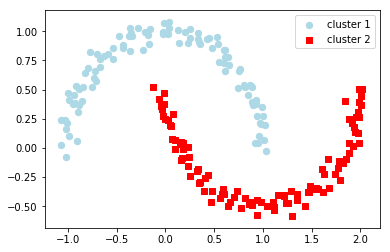

In [172]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')

y_db = db.fit_predict(X)

plt.scatter(X[y_db==0, 0], X[y_db==0, 1], c='lightblue', marker='o', s=40, label='cluster 1')
plt.scatter(X[y_db==1, 0], X[y_db==1, 1], c='red', marker='s', s=40, label='cluster 2')

plt.legend()
plt.show()


DBSCAN算法可以成功地对半月形数据进行划分，这也是DBSCAN的优势之一(可对任意形状的数据进行聚类)。同时也应注意到DBSCAN算法的一些缺点，对于给定样本数量数据集，随着特征维度的增加，DBSCAN算法的计算量会迅速上升。此外，如果数据集的密度差异相对较大，则找到合适的MintPts及$\varepsilon$的组合较为困难。

总结：在本篇笔记中，探讨了三种最基本的聚类算法：基于原型的k-means聚类算法、凝聚层次聚类以及基于密度的空间聚类算法(DBSCAN)。k-means算法基于指定数量的簇中心，将样本划分为球形的簇。凝聚层次聚类不需要事先指定簇的数量，而且聚类的结果可以通过树状图进行可视化的展示，这有助于分析和解释聚类结果。DBSCAN算法基于样本的密度对其进行分组，并且它可以处理异常值以及识别非球形簇。

在此，有必要提一下另一种更为先进的聚类方法：图聚类。而图聚类系列中最为突出的方法应该是谱聚类算法。虽然实现谱聚类有多种不同的方法，但它们的共同之处在于：均使用基于相似矩阵的特征向量来获得簇间的关系。有兴趣的读者可以通过以下链接了解详细内容：<http://arxiv.org/pdf/0711.0189v1.pdf>